# Lab7: Iris Dataset – K-Means and PCA 

## Author: Dianna Hummel

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

##### Step A

In [4]:
iris_data = pd.read_csv("iris.csv")
iris_data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris_data.tail(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
iris_data.shape

(150, 5)

In [10]:
iris_data.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object

In [11]:
iris_data.groupby(['Species']).describe().T

Species            Iris-setosa  Iris-versicolor  Iris-virginica
PetalLength count    50.000000        50.000000       50.000000
            mean      1.462000         4.260000        5.552000
            std       0.173664         0.469911        0.551895
            min       1.000000         3.000000        4.500000
            25%       1.400000         4.000000        5.100000
            50%       1.500000         4.350000        5.550000
            75%       1.575000         4.600000        5.875000
            max       1.900000         5.100000        6.900000
PetalWidth  count    50.000000        50.000000       50.000000
            mean      0.246000         1.326000        2.026000
            std       0.105386         0.197753        0.274650
            min       0.100000         1.000000        1.400000
            25%       0.200000         1.200000        1.800000
            50%       0.200000         1.300000        2.000000
            75%       0.300000         1.500000        2.300000
            max       0.600000         1.800000        2.500000
SepalLength count    50.000000        50.000000       50.000000
            mean      5.006000         5.936000        6.588000
            std       0.352490         0.516171        0.635880
            min       4.300000         4.900000        4.900000
            25%       4.800000         5.600000        6.225000
            50%       5.000000         5.900000        6.500000
            75%       5.200000         6.300000        6.900000
            max       5.800000         7.000000        7.900000
SepalWidth  count    50.000000        50.000000       50.000000
            mean      3.428000         2.770000        2.974000
            std       0.379064         0.313798        0.322497
            min       2.300000         2.000000        2.200000
            25%       3.200000         2.525000        2.800000
            50%       3.400000         2.800000        3.000000
            75%       3.675000         3.000000        3.175000
            max       4.400000         3.400000        3.800000

In [13]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

##### Step B

In [14]:
iris_corr = iris_data.corr()
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
PetalWidth,0.817941,-0.366126,0.962865,1.000000


In [15]:
grps = ['NegStrong','NegMedium','Weak',
        'PosMedium', 'PosStrong']
cols = ['SepalLength','SepalWidth',
        'PetalLength','PetalWidth']
for col in cols:
    iris_corr[col] = pd.cut (iris_corr[col], 
         (-1,-0.8,-0.6,0.6,0.8,1), labels = grps)
iris_corr

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,PosStrong,Weak,PosStrong,PosStrong
SepalWidth,Weak,PosStrong,Weak,Weak
PetalLength,PosStrong,Weak,PosStrong,PosStrong
PetalWidth,PosStrong,Weak,PosStrong,PosStrong


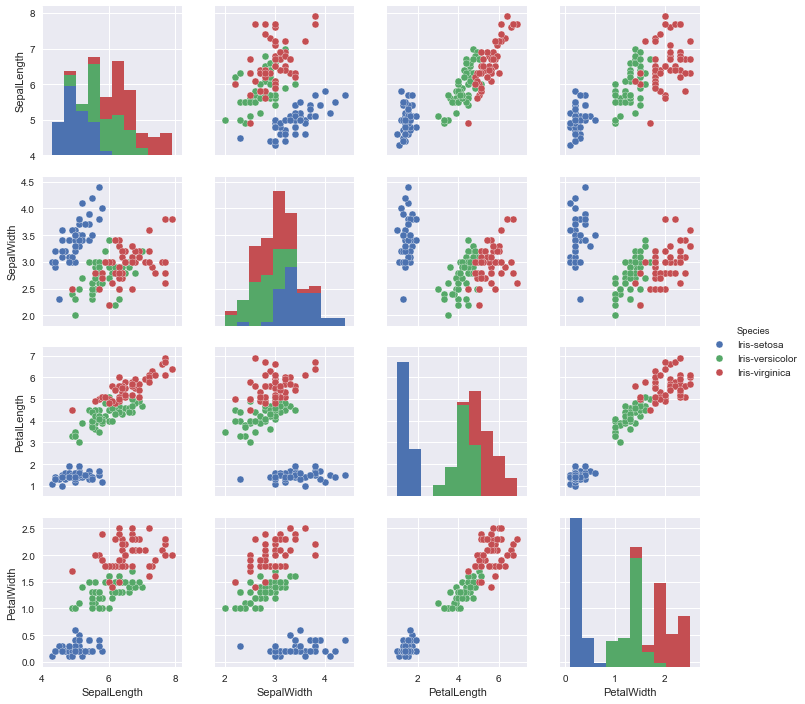

In [16]:
sns.pairplot (iris_data, hue='Species', size=2.5)

In [17]:
spec_cat = pd.factorize (iris_data['Species'])
Y_iris = spec_cat[0]
iris_names = ['Sepal Length','Sepal Width',
              'Petal Length','Petal Width']
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

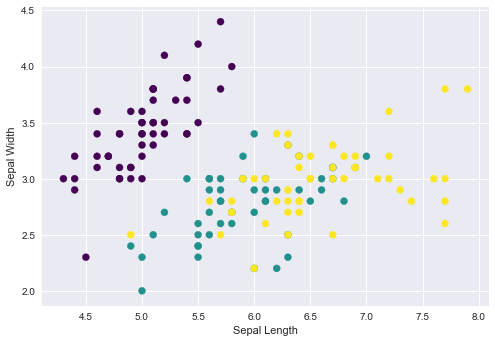

In [22]:
x = 0  # Column Sepal Length
y = 1  # Column Sepal Width
plt.scatter(iris_data.iloc[:,x], iris_data.iloc[:,y],
            c = Y_iris,
            s = 50, 
            cmap = 'viridis')
plt.xlabel (iris_names[x])
plt.ylabel (iris_names[y])

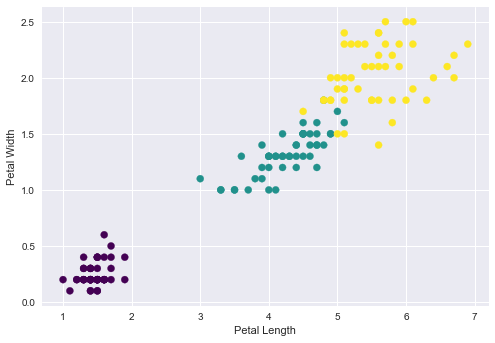

In [23]:
x = 2  # Column Petal Length
y = 3  # Column Petal Width
plt.scatter (iris_data.iloc[:,x],
            iris_data.iloc[:, y], 
            c = Y_iris, s = 50, 
            cmap = 'viridis')
plt.xlabel (iris_names[x])
plt.ylabel (iris_names[y])

##### Step C

In [26]:
X_iris = iris_data.drop ('Species', axis=1)
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_iris)
y_model = kmeans.predict (X_iris)
y_model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
y_test = np.choose (Y_iris,[1,0,2]).astype (int)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
acc_score = accuracy_score (y_test, y_model)
acc_score

0.89333333333333331

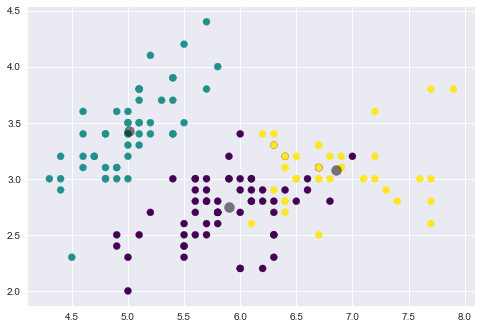

In [29]:
plt.scatter (X_iris.iloc[:,0], X_iris.iloc[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1],
             c = 'black', s = 100, alpha = 0.5)

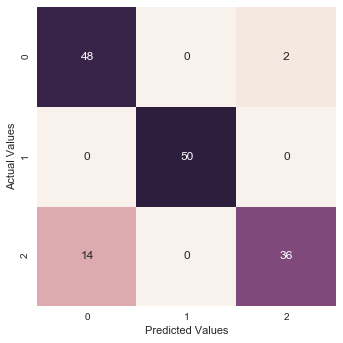

In [30]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')


##### Step D

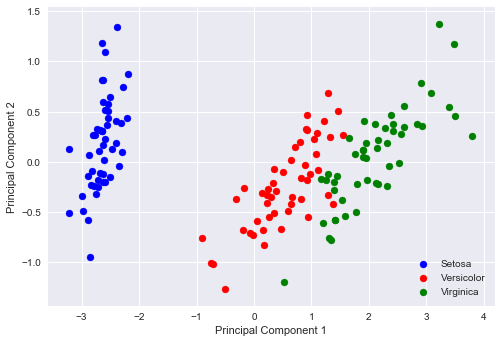

In [36]:
model = PCA (n_components=2) 
model.fit (X_iris) 
X_2D = model.transform (X_iris)
for label, color, i in zip(('Setosa','Versicolor','Virginica'),('blue','red','green'), (0, 1, 2)):
    plt.scatter (X_2D[Y_iris == i, 0], 
                 X_2D[Y_iris == i, 1], 
                 label=label, color=color)
plt.xlabel ('Principal Component 1')
plt.ylabel ('Principal Component 2')
plt.legend (loc='lower right')


##### Step E

In [42]:
X_std_iris = StandardScaler().fit_transform(X_iris)
X_std_iris


array([[ -9.00681170e-01,   1.01900435e+00,  -1.34022653e+00,
         -1.31544430e+00],
       [ -1.14301691e+00,  -1.31979479e-01,  -1.34022653e+00,
         -1.31544430e+00],
       [ -1.38535265e+00,   3.28414053e-01,  -1.39706395e+00,
         -1.31544430e+00],
       [ -1.50652052e+00,   9.82172869e-02,  -1.28338910e+00,
         -1.31544430e+00],
       [ -1.02184904e+00,   1.24920112e+00,  -1.34022653e+00,
         -1.31544430e+00],
       [ -5.37177559e-01,   1.93979142e+00,  -1.16971425e+00,
         -1.05217993e+00],
       [ -1.50652052e+00,   7.88807586e-01,  -1.34022653e+00,
         -1.18381211e+00],
       [ -1.02184904e+00,   7.88807586e-01,  -1.28338910e+00,
         -1.31544430e+00],
       [ -1.74885626e+00,  -3.62176246e-01,  -1.34022653e+00,
         -1.31544430e+00],
       [ -1.14301691e+00,   9.82172869e-02,  -1.28338910e+00,
         -1.44707648e+00],
       [ -5.37177559e-01,   1.47939788e+00,  -1.28338910e+00,
         -1.31544430e+00],
       [ -1.26418478e

In [43]:
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_std_iris)
y_model = kmeans.predict (X_std_iris)

acc_score = accuracy_score (y_test, y_model)
acc_score

0.83333333333333337

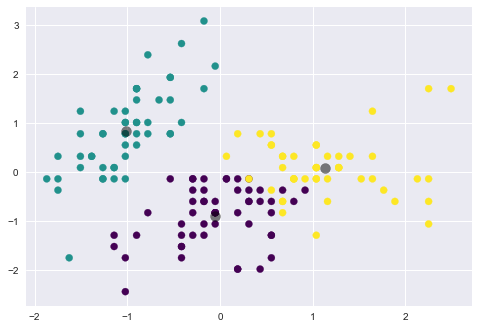

In [45]:
plt.scatter (X_std_iris[:,0], X_std_iris[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], 
            c = 'black', s = 100, alpha = 0.5)

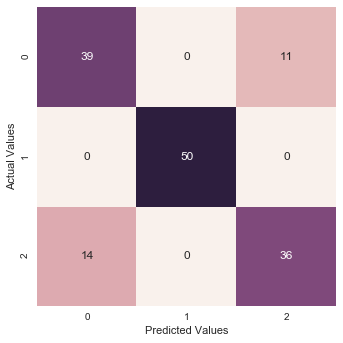

In [46]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')

##### Step F

In [47]:
X_norm_iris = MinMaxScaler().fit_transform(X_iris)
X_norm_iris

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ],
       [ 0.30555556,  0.70833333,  0.08474576,  0.04166667],
       [ 0.13888889,  0.58333333,  0.10169492,  0.04166667],
       [ 0.13888889,  0.41666667,  0.06779661,  0.        ],
       [ 0.        ,  0.41666667,  0.01694915,  0.        ],
       [ 0.41666667,  0.83333333,  0.03389831,  0.04166667],
       [ 0.38888889,  1.        ,  0.08474576,  0.125     ],
       [ 0.30555556,  0.

In [48]:
kmeans = KMeans (n_clusters=3, random_state = 1)
kmeans.fit (X_norm_iris)
y_model = kmeans.predict (X_norm_iris)
acc_score = accuracy_score (y_test, y_model)
acc_score

0.88666666666666671

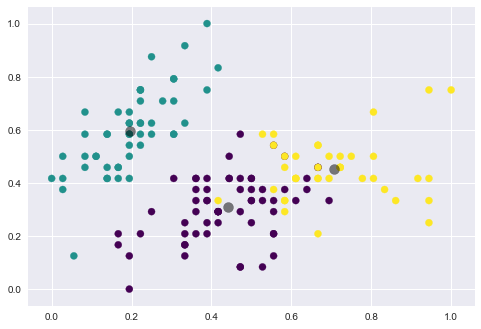

In [49]:
plt.scatter (X_norm_iris[:,0], X_norm_iris[:,1],
            c = y_model, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter (centers[:,0], centers[:,1], 
                 c = 'black', s = 100, alpha = 0.5)

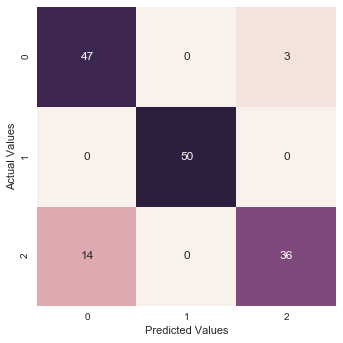

In [50]:
mat = confusion_matrix (y_test, y_model)
sns.heatmap (mat, square=True, annot=True,
             cbar=False)
plt.xlabel ('Predicted Values')
plt.ylabel ('Actual Values')
